In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Number 1**

In [3]:
satu = pd.read_csv('1A.tsv', sep = '\t')
satu.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


## 1a
Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key
findings and anomalies existing in the dataset. Make sure to handle the anomalies accordingly!

In [5]:
satu.shape # 418 rows with 18 attributes

(418, 18)

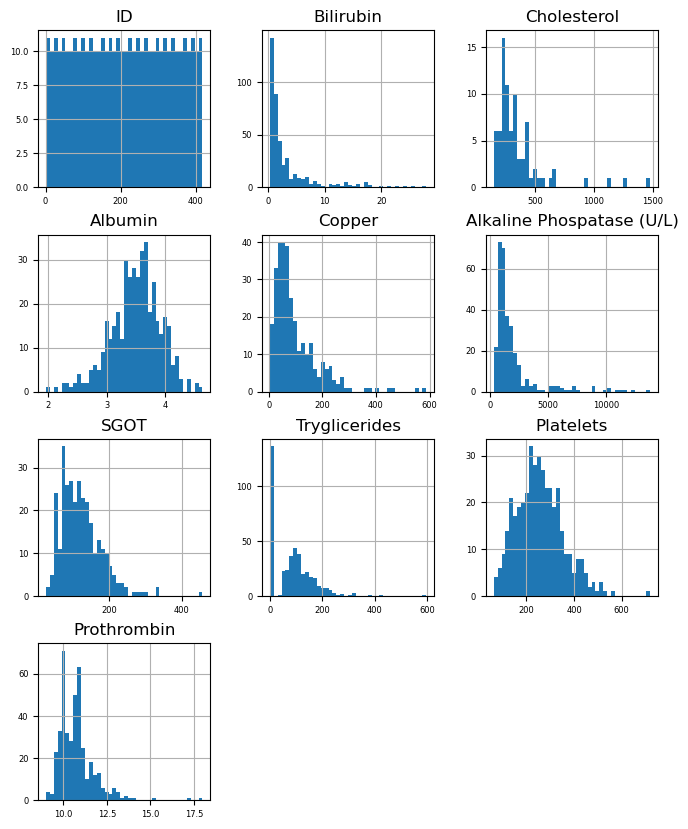

In [6]:
satu.hist(figsize=(8, 10), bins=40, xlabelsize=6, ylabelsize=6);

In [7]:
# identifying problems
satu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

In [8]:
# checking missing values
satu.isnull().sum()

ID                             0
Registration Date              0
Drug                         106
Birth Date                     0
Gender                         0
Ascites                      106
Hepatomegaly                 106
Edema                          0
Bilirubin                      0
Cholesterol                  338
Albumin                        0
Copper                       108
Alkaline Phospatase (U/L)    106
SGOT                         106
Tryglicerides                  0
Platelets                     11
Prothrombin                    2
Stage                          6
dtype: int64

In [9]:
satu = satu.dropna(axis=0, thresh=satu.shape[1]-3) # i am dropping rows that contain more than 3 null values, assuming it will be invalid
satu.shape

(312, 18)

In [10]:
# checking missing values
satu.isnull().sum()

ID                             0
Registration Date              0
Drug                           0
Birth Date                     0
Gender                         0
Ascites                        0
Hepatomegaly                   0
Edema                          0
Bilirubin                      0
Cholesterol                  232
Albumin                        0
Copper                         2
Alkaline Phospatase (U/L)      0
SGOT                           0
Tryglicerides                  0
Platelets                      4
Prothrombin                    0
Stage                          0
dtype: int64

NULL values:



1.   Cholesterol
2.   Copper
3.   Platelets




Wrong data types:
1. ID (int) should be objects



In [13]:
satu['ID'] = satu['ID'].astype('str')

In [14]:
satu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         312 non-null    object 
 1   Registration Date          312 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 312 non-null    object 
 4   Gender                     312 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      312 non-null    object 
 8   Bilirubin                  312 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    312 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64
 14 

In [15]:
# checking inconsistencies for categorical variable
satu['Drug'].value_counts()

Drug
D-penicillamine    155
Placebo            152
d-penicillamine      3
placebo              1
lacebo               1
Name: count, dtype: int64

In [16]:
satu['Gender'].value_counts()

Gender
F    276
M     36
Name: count, dtype: int64

In [17]:
satu['Ascites'].value_counts()

Ascites
N    288
Y     24
Name: count, dtype: int64

In [18]:
satu['Hepatomegaly'].value_counts()

Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

In [19]:
satu['Edema'].value_counts()

Edema
N    263
S     29
Y     20
Name: count, dtype: int64

In [20]:
satu['Stage'].value_counts()

Stage
stage_3    120
Stage4     109
Stage 2     67
Stage 1     16
Name: count, dtype: int64

Inconsistent format:
1. Drug
2. Stage

In [22]:
satu['Drug'] = satu['Drug'].replace({'d-penicillamine':'D-penicillamine', 'placebo':'Placebo', 'lacebo':'Placebo'})
satu['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

In [23]:
satu['Stage'] = satu['Stage'].replace({'Stage 1':'Stage_1', 'Stage 2':'Stage_2', 'stage_3':'Stage_3', 'Stage4':'Stage_4'})
satu['Stage'].value_counts()

Stage
Stage_3    120
Stage_4    109
Stage_2     67
Stage_1     16
Name: count, dtype: int64

In [24]:
# # handle missing value (CATEGORICAL): input mode
# satu['Drug'] = satu['Drug'].fillna(satu['Drug'].mode()[0])
# satu['Ascites'] = satu['Ascites'].fillna(satu['Ascites'].mode()[0])
# satu['Hepatomegaly'] = satu['Hepatomegaly'].fillna(satu['Hepatomegaly'].mode()[0])
# satu['Stage'] = satu['Stage'].fillna(satu['Stage'].mode()[0])

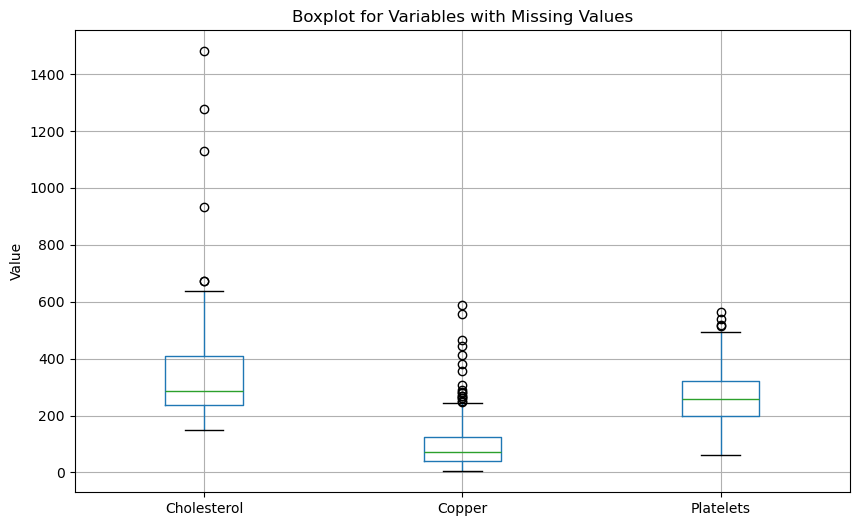

In [25]:
# looking for outliers
boxplot = satu.boxplot(column=['Cholesterol', 'Copper', 'Platelets'], figsize=(10, 6))
plt.title("Boxplot for Variables with Missing Values")
plt.ylabel("Value")
plt.show()

All of the variables that contain missing value, indeed also have outliers, so it was best to do inputation using median

In [27]:
# inpute by median
columns = ['Cholesterol', 'Copper', 'Platelets']

for col in columns:
    print(f"Median of {col}: {satu[col].median()}")
    satu[col] = satu[col].fillna(satu[col].median())

Median of Cholesterol: 284.5
Median of Copper: 73.0
Median of Platelets: 257.0


In [28]:
satu.isnull().sum()

ID                           0
Registration Date            0
Drug                         0
Birth Date                   0
Gender                       0
Ascites                      0
Hepatomegaly                 0
Edema                        0
Bilirubin                    0
Cholesterol                  0
Albumin                      0
Copper                       0
Alkaline Phospatase (U/L)    0
SGOT                         0
Tryglicerides                0
Platelets                    0
Prothrombin                  0
Stage                        0
dtype: int64

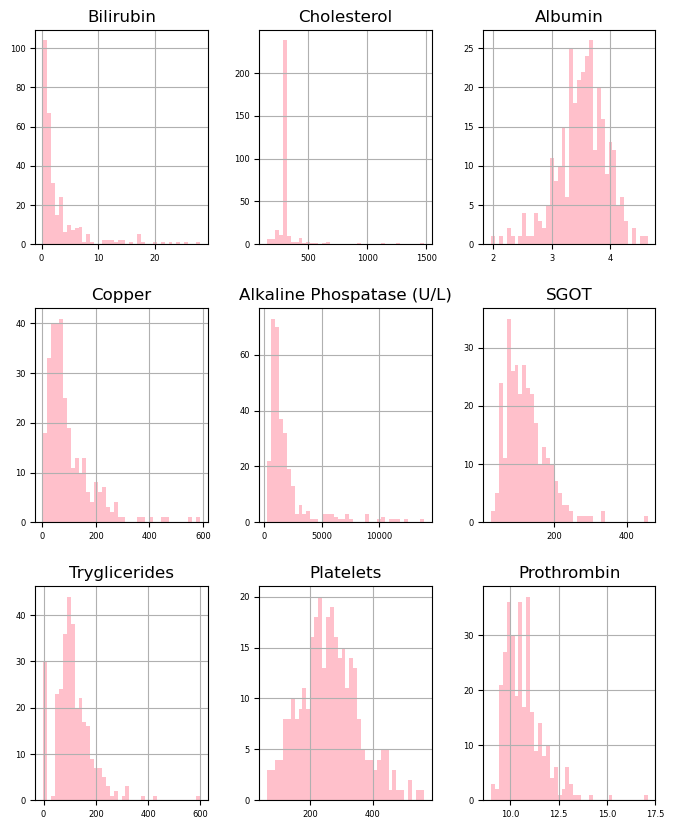

In [29]:
# see the distrubution after data cleaning
satu.hist(figsize=(8, 10), bins=40, xlabelsize=6, ylabelsize=6, color='pink');

Next we need to do some encoding to several CATEGORICAL data:

1.  Drug (D-penicillamine	or Placebo)
2.  Ascites (Y or N)
3.  Hepatomegaly (Y or N)
4.  Edema (N = no edema, S = edema without diuretics, Y = edema despite diuretic
therapy)



In [31]:
# patient with severe liver issue tends to use D-penicillamine as the medication that may reduce copper buildup in the liver, potentially slowing cirrhosis progression
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
medication_enc = pd.DataFrame(onehot.fit_transform(satu[['Drug']]).toarray(),
                              columns = onehot.get_feature_names_out())
satu.reset_index()
satu = pd.concat([satu, medication_enc], axis=1)

In [32]:
satu.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_D-penicillamine,Drug_Placebo
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage_4,1.0,0.0
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,Stage_3,1.0,0.0
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,284.5,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage_4,1.0,0.0
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage_4,1.0,0.0
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,284.5,3.53,143.0,671.0,113.15,72.0,136.0,10.9,Stage_3,0.0,1.0


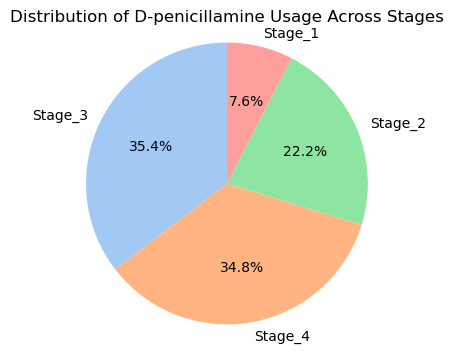

In [33]:
# Pie chart distribution of the D-penicillamine
drug_stage_counts = satu[satu['Drug_D-penicillamine'] == 1]['Stage'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(drug_stage_counts, labels=drug_stage_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of D-penicillamine Usage Across Stages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

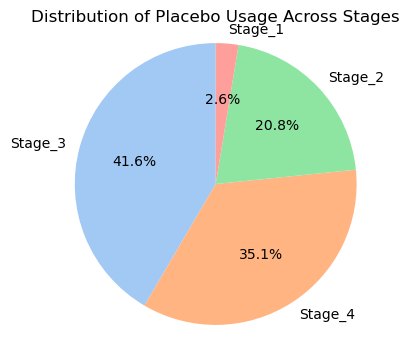

In [34]:
# Pie chart distribution of the Placebo
drug_stage_counts2 = satu[satu['Drug_Placebo'] == 1]['Stage'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(drug_stage_counts2, labels=drug_stage_counts2.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Placebo Usage Across Stages')
plt.axis('equal')
plt.show()

We learn that Presence of ascites, hepatomegaly, and severe edema are indicators of advanced disease (Cirhossis)

In [36]:
# binary encoding for Y or N variables
satu['Ascites'] = satu['Ascites'].replace({'Y':1, 'N':0})
satu['Ascites'].value_counts()

C:\Users\acer\AppData\Local\Temp\ipykernel_1504\2203076746.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  satu['Ascites'] = satu['Ascites'].replace({'Y':1, 'N':0})


Ascites
0    288
1     24
Name: count, dtype: int64

Ascites         0         1
Stage                      
Stage_1  1.000000       NaN
Stage_2  0.970149  0.029851
Stage_3  0.991667  0.008333
Stage_4  0.807339  0.192661


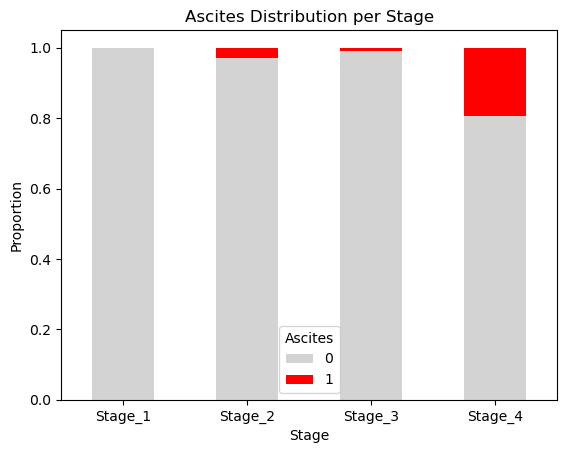

In [37]:
# group data by 'Stage' and calculate the distribution of 'Ascites'
ascites_distribution = satu.groupby('Stage')['Ascites'].value_counts(normalize=True).unstack()

# Display the distribution
print(ascites_distribution)

# Plotting the distribution (optional)
ascites_distribution.plot(kind='bar', stacked=True, color=['lightgrey', 'red'])
plt.title('Ascites Distribution per Stage')
plt.xlabel('Stage')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Ascites')
plt.show()

Ascites founded in higher stage of cirrhosis

In [38]:
satu['Hepatomegaly'] = satu['Hepatomegaly'].replace({'Y':1, 'N':0})
satu['Hepatomegaly'].value_counts()

C:\Users\acer\AppData\Local\Temp\ipykernel_1504\777282627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  satu['Hepatomegaly'] = satu['Hepatomegaly'].replace({'Y':1, 'N':0})


Hepatomegaly
1    160
0    152
Name: count, dtype: int64

Hepatomegaly         0         1
Stage                           
Stage_1       1.000000       NaN
Stage_2       0.716418  0.283582
Stage_3       0.558333  0.441667
Stage_4       0.192661  0.807339


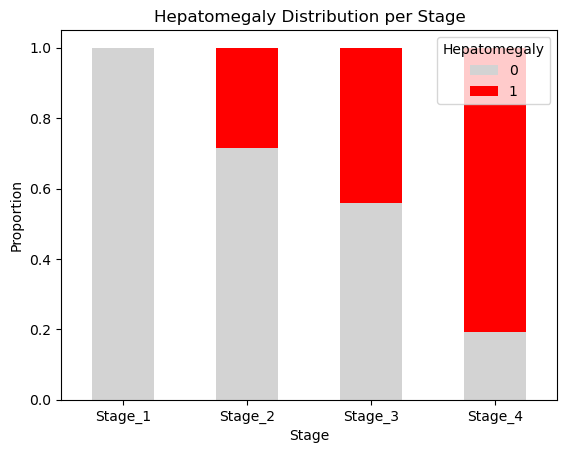

In [39]:
# group data by 'Stage' and calculate the distribution of 'Hepatomegaly'
hepatomegaly_distribution = satu.groupby('Stage')['Hepatomegaly'].value_counts(normalize=True).unstack()

# Display the distribution
print(hepatomegaly_distribution)

# Plotting the distribution (optional)
hepatomegaly_distribution.plot(kind='bar', stacked=True, color=['lightgrey', 'red'])
plt.title('Hepatomegaly Distribution per Stage')
plt.xlabel('Stage')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Hepatomegaly')
plt.show()

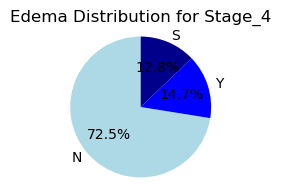

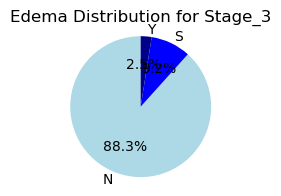

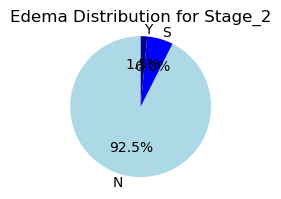

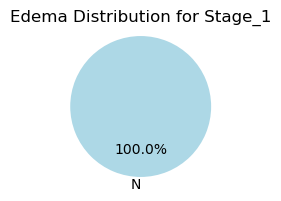

In [40]:
# Edema distribution before transformation
edema_before = satu.groupby('Stage')['Edema'].value_counts()

stages = satu['Stage'].unique()
for stage in stages:
    stage_data = satu[satu['Stage'] == stage]
    edema_counts = stage_data['Edema'].value_counts()
    plt.figure(figsize=(2, 2))
    plt.pie(edema_counts, labels=edema_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'blue', 'darkblue'])
    plt.title(f'Edema Distribution for {stage}')
    plt.axis('equal')
    plt.show()

In [41]:
# label encoding for Edema
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
satu['Edema'] = label_encoding.fit_transform(satu['Edema'])
satu['Edema'].unique()

array([2, 0, 1])

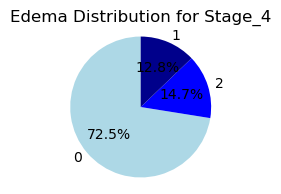

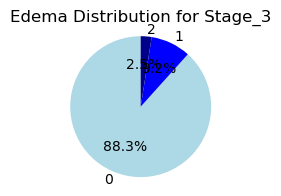

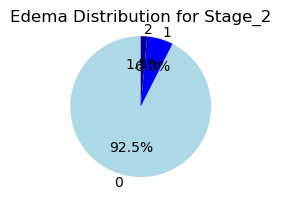

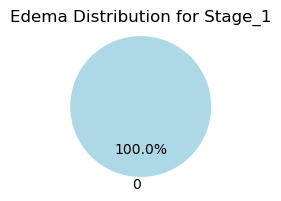

In [42]:
# Edema distribution after transformation
# to ensure the validity of the encoding
edema_after = satu.groupby('Stage')['Edema'].value_counts()

stages = satu['Stage'].unique()
for stage in stages:
    stage_data = satu[satu['Stage'] == stage]
    edema_counts = stage_data['Edema'].value_counts()
    plt.figure(figsize=(2, 2))
    plt.pie(edema_counts, labels=edema_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'blue', 'darkblue'])
    plt.title(f'Edema Distribution for {stage}')
    plt.axis('equal')
    plt.show()

In [43]:
# # label encoding for 'Stage' (XGBoost need it to be in numerical: 1 2 3 4)
# # i do it manually because label_encoding automatically start from 0
# satu['Stage'] = satu['Stage'].replace({'Stage_1':1, 'Stage_2':2, 'Stage_3':3, 'Stage_4':4})
# satu['Stage'].value_counts()

In [44]:
# label encoding for 'Stage'
satu['Stage'] = label_encoding.fit_transform(satu['Stage'])
satu['Stage'].unique()

array([3, 2, 1, 0])

## 1b
Train a Random Forest and an XGBoost model, fine-tune at least 3 of their
hyperparameters with at least 3 search space and evaluate the models on an independent test set!

In [46]:
satu_new = satu.drop(columns = ['ID', 'Registration Date', 'Birth Date', 'Drug', 'Gender'], axis = 1)
satu_new.head()

,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_D-penicillamine,Drug_Placebo
0,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3,1.0,0.0
1,0,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2,1.0,0.0
2,0,0,1,1.4,284.5,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3,1.0,0.0
3,0,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3,1.0,0.0
4,0,1,0,3.4,284.5,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2,0.0,1.0


In [47]:
input = satu_new.drop('Stage', axis=1)
output = satu_new['Stage']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.8, random_state = 0)

In [49]:
print('train data: ', x_train.shape)
print('test data: ', x_test.shape)

train data:  (62, 14)
test data:  (250, 14)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [51]:
# i put the models in loop to save times and to reduce repetition
# comparing the model before finetuning
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extreme Gradient Boosting": XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
}

for name, model in models.items():
    print(f"~~~~~~~~~~~~~~~~~~~~~~ {name} ~~~~~~~~~~~~~~~~~~~~~~")
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred, target_names=['Stage_1','Stage_2','Stage_3','Stage_4']))
    print("\n")

~~~~~~~~~~~~~~~~~~~~~~ Random Forest ~~~~~~~~~~~~~~~~~~~~~~
Random Forest Accuracy: 0.496
              precision    recall  f1-score   support

     Stage_1       1.00      0.08      0.14        13
     Stage_2       0.25      0.04      0.06        56
     Stage_3       0.44      0.67      0.54        95
     Stage_4       0.59      0.66      0.62        86

    accuracy                           0.50       250
   macro avg       0.57      0.36      0.34       250
weighted avg       0.48      0.50      0.44       250



~~~~~~~~~~~~~~~~~~~~~~ Extreme Gradient Boosting ~~~~~~~~~~~~~~~~~~~~~~
Extreme Gradient Boosting Accuracy: 0.452
              precision    recall  f1-score   support

     Stage_1       0.20      0.08      0.11        13
     Stage_2       0.22      0.18      0.20        56
     Stage_3       0.48      0.49      0.49        95
     Stage_4       0.54      0.64      0.59        86

    accuracy                           0.45       250
   macro avg       0.36      0.35

In [52]:
# hyperparameter tuning
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 3, 5, 10],
        'max_features': ['sqrt', 'log2', None, 0.8]
    },
    "Extreme Gradient Boosting": {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [3, 5, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        #'min_child_weight': [1, 3, 5, 7]
    }
}

In [53]:
from sklearn.model_selection import GridSearchCV

# tune each model
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(
        estimator = model,
        param_grid = param_grids[name],
        scoring = "accuracy",
        cv = 5,  # 5-fold cross-validation
        n_jobs = -1  # Use all processors
    )

    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {name}: {grid_search.best_score_}\n")

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 5, 'max_features': 0.8, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy for Random Forest: 0.6076923076923076

Tuning Extreme Gradient Boosting...
Best Parameters for Extreme Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy for Extreme Gradient Boosting: 0.5307692307692308



## 1c
Analyze the evaluation results based on at least 3 evaluation metrics and make
a conclusion!

In [112]:
randomforestBest = RandomForestClassifier(max_depth=5, n_estimators=50, min_samples_split=5, max_features=0.8, random_state = 42)
randomforestBest.fit(x_train, y_train)
yrandomforest_predictBest = randomforestBest.predict(x_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, yrandomforest_predictBest)}")
print(classification_report(yrandomforest_predictBest, y_test))

Random Forest Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.23      0.16        30
           2       0.63      0.47      0.54       129
           3       0.67      0.64      0.66        91

    accuracy                           0.50       250
   macro avg       0.36      0.33      0.34       250
weighted avg       0.59      0.50      0.53       250



The Random Forest model performs slightly better with an accuracy of 50%. While it still struggles with class 0, where there is no correct prediction, it shows better results for classes 2 and 3. Class 2 has a recall of 0.47 and F1-score of 0.54, while class 3 has a recall of 0.64 and F1-score of 0.66. Despite these stronger results in some classes, the model's overall performance is still not optimal, with the macro average indicating weaknesses across all classes. The weighted average shows better results, suggesting the model performs better on more frequent classes.

In [114]:
XGBoostBest = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 100, random_state=42, eval_metric='logloss', use_label_encoder=False)
XGBoostBest.fit(x_train, y_train)
yXGBoost_predictBest = XGBoostBest.predict(x_test)

print(f"Extreme Gradient Boosting Accuracy: {accuracy_score(y_test, yXGBoost_predictBest)}")
print(classification_report(yXGBoost_predictBest, y_test))

Extreme Gradient Boosting Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.16      0.20      0.18        46
           2       0.49      0.46      0.47       103
           3       0.63      0.57      0.60        95

    accuracy                           0.44       250
   macro avg       0.32      0.31      0.31       250
weighted avg       0.47      0.44      0.45       250



The Extreme Gradient Boosting (XGBoost) model shows an accuracy of 44%. Its performance is quite varied across different classes. It struggles significantly with class 0, where both precision and recall are zero, indicating that it fails to correctly classify any samples of that class. It performs better on class 3, with a precision of 0.63 and recall of 0.57, achieving a decent F1-score of 0.60. Overall, the model's performance is low, especially for the underrepresented classes, as reflected in the low macro and weighted averages.

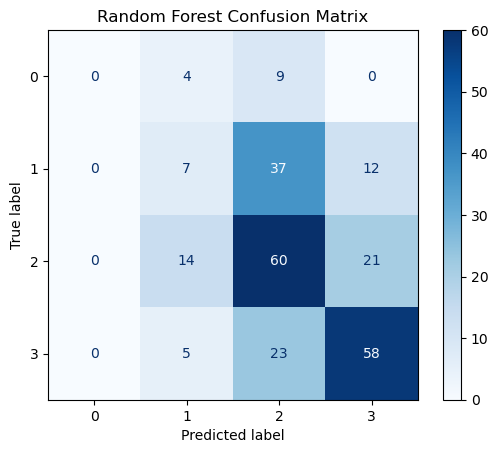

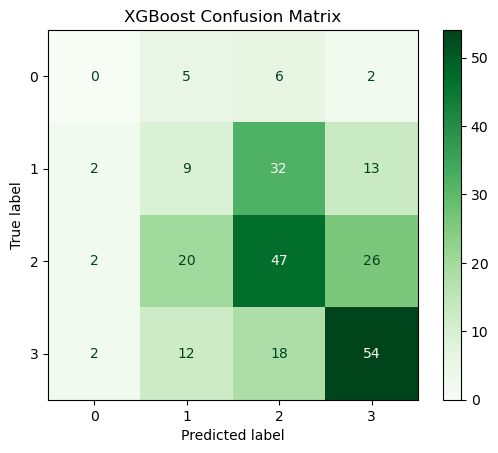

In [135]:
disp = ConfusionMatrixDisplay.from_estimator(randomforestBest, x_test, y_test, cmap=plt.cm.Blues) # Change colormap
disp.ax_.set_title("Random Forest Confusion Matrix") # Add title
plt.show()

disp = ConfusionMatrixDisplay.from_estimator(best_models['Extreme Gradient Boosting'], x_test, y_test, cmap=plt.cm.Greens) # Change colormap
disp.ax_.set_title("XGBoost Confusion Matrix") #Add title
plt.show()

The Random Forest confusion matrix shows that class 2 and class 3 are predicted most accurately, with high values on the diagonal for these classes. Class 1 is reasonably well-predicted but has some misclassifications, especially into class 2. Class 0 performs poorly, with most of its instances misclassified as class 1 or class 2. Overall, the model handles classes 2 and 3 better but struggles with distinguishing class 0. This suggests that class 0 may lack clear distinguishing features or suffers from class imbalance.

The confusion matrix reveals that the XGBoost classifier performs well for class 3, with the highest correct predictions, while class 2 also has a fair number of accurate predictions but notable confusion with class 3. Class 1 frequently gets misclassified as class 2, and class 0 suffers from poor performance overall, with many predictions spread across other classes. This indicates the model struggles to differentiate between some classes, especially 1 and 2, and highlights potential class imbalance or overlapping features in the dataset.

**Both models struggle to predict all classes, especially class 0, which is often misclassified. Random Forest performs slightly better, especially for classes 2 and 3, while XGBoost does well for class 3 but struggles with the rest. The poor performance suggests issues like class imbalance or overlapping features in the dataset. Improving the data or testing other methods may help.**

**This can be seen when tuning the hyperparameters, as the model's accuracy doesn't improve significantly. Worse, with Extreme Gradient Boosting, the accuracy actually decreased. This indicates a weakness in the small dataset.**

## 1d
From the best model, analyze which features can be considered important to
predict the outputs!

In [155]:
importances = randomforestBest.feature_importances_
feature_names = x_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance from Random Forest:\n", importance_df)

Feature Importance from Random Forest:
                       Feature  Importance
5                     Albumin    0.189825
11                Prothrombin    0.169875
9               Tryglicerides    0.157898
7   Alkaline Phospatase (U/L)    0.093528
8                        SGOT    0.092077
3                   Bilirubin    0.077114
10                  Platelets    0.071235
4                 Cholesterol    0.060084
6                      Copper    0.058760
1                Hepatomegaly    0.013403
12       Drug_D-penicillamine    0.004793
13               Drug_Placebo    0.004777
0                     Ascites    0.004721
2                       Edema    0.001909


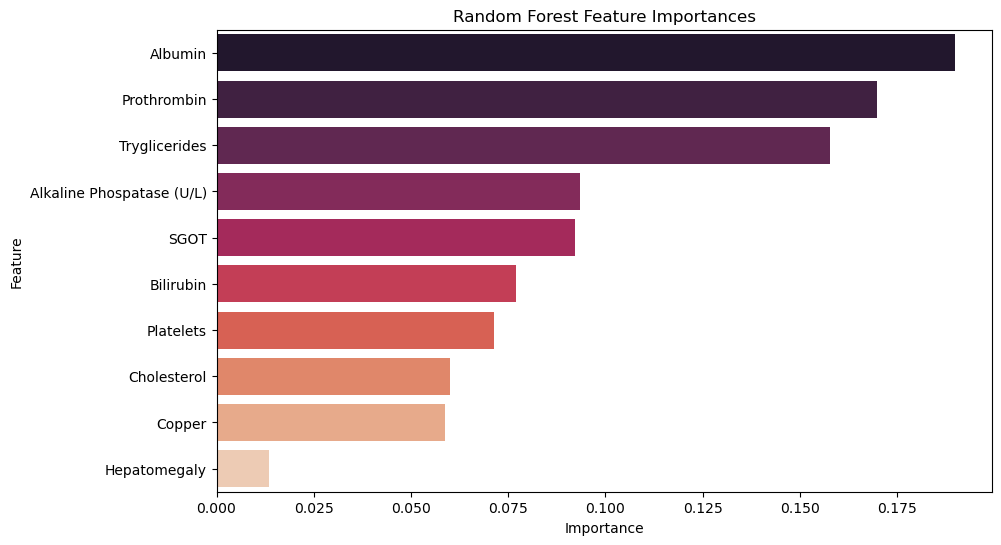

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette="rocket") # Top 10 features
plt.title('Random Forest Feature Importances')
plt.title('Random Forest Feature Importances')
plt.show()

From the Random Forest model, feature importance analysis reveals that **Albumin** is the most significant predictor of the `Stage` of cirrhosis, followed closely by **Prothrombin** and **Triglycerides**. These features likely capture critical biochemical markers indicative of disease progression. Other important features include **Alkaline Phosphatase**, **SGOT**, and **Bilirubin**, all of which are liver function markers closely associated with cirrhosis severity. 

Less significant features include **Copper**, **Cholesterol**, and **Platelets**, which may still contribute but to a lesser extent. **Hepatomegaly**, **Ascites**, and drug-related features (D-penicillamine and placebo) are among the least important, suggesting they have minimal direct influence on predicting the stage of cirrhosis in this dataset.

This importance ranking can guide further feature selection and help focus on critical biomarkers for improving model performance and clinical insights.

**Maybe the reason why**

Albumin: A key protein produced by the liver, its levels indicate liver function. Lower albumin levels are strongly associated with advanced liver disease.

Prothrombin: Reflects blood clotting ability, which is affected in cirrhosis as the liver produces clotting factors. Abnormal prothrombin times signal disease progression.

Triglycerides: Liver dysfunction impacts fat metabolism, causing changes in triglyceride levels that correlate with liver disease severity.

## 1e
Make a presentation video explaining the key points of your analysis (max. 5
minutes)!

https://drive.google.com/drive/folders/1g4SdKxXIb8bVbl6Oco1yvUajn-tMGfrt?usp=drive_link